In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

##### [과제] PCA로 차원 축소한 붓꽃 데이터의 결과를 시각화하고 분류 평가 하세요 (기존과 비교)
---

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


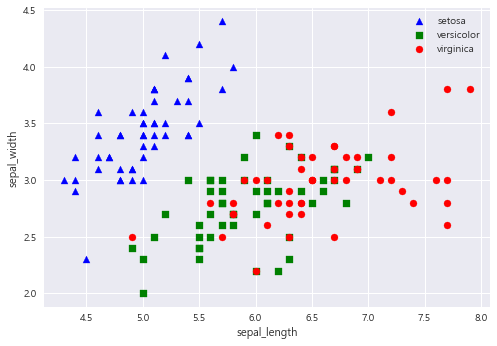

In [2]:
iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris = pd.DataFrame(iris.data, columns = columns)
df_iris['target'] = iris.target
display(df_iris.head())

markers = ['^','s','o']
colors = ['b', 'g', 'r']
a = zip(markers, colors)
for i, j in enumerate(zip(markers, colors)):
    x_axis_data = df_iris[df_iris.target==i]['sepal_length']
    y_axis_data = df_iris[df_iris.target==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=j[0], color = j[1], label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

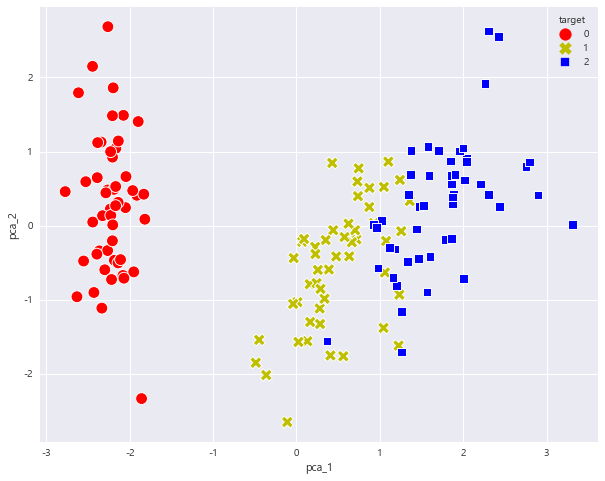

In [3]:
from sklearn.decomposition import PCA

df_iris1 = df_iris.drop('target', axis = 1)
iris_scaled = StandardScaler().fit_transform(df_iris1)

pca = PCA(n_components = 2)
iris_pca = pca.fit_transform(iris_scaled)

pca_columns = ['pca_1', 'pca_2']
df_iris_pca = pd.DataFrame(iris_pca, columns = pca_columns)
df_iris_pca['target'] = iris.target
fig = plt.figure(figsize = (10,8))
sns.scatterplot(data = df_iris_pca, x = 'pca_1', y = 'pca_2', hue = 'target', style = 'target', palette = ['r', 'y', 'b'], size = 'target', sizes = (140, 150))
plt.show()

In [4]:
def get_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    return X_train, X_test, y_train, y_test

In [40]:
# 원본

X = df_iris.drop('target', axis = 1)
y = df_iris.target

X_train, X_test, y_train, y_tset = get_train_test(X, y)

rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 7, min_samples_split = 4, random_state = 0, n_jobs = -1)

score = cross_validate(rf_clf, X, y, scoring = ['accuracy', 'neg_mean_squared_error'], cv = 3)

accuracy = score['test_accuracy']
mse = -1 * score['test_neg_mean_squared_error']
rmse = np.sqrt(mse)

print('정확도 :', round(np.mean(accuracy), 3))
print('mse :', round(np.mean(mse), 3))
print('rmse :', round(np.mean(rmse), 3))

TypeError: cross_validate() got an unexpected keyword argument 'stratify'

In [11]:
# 차원 축소

X_re = df_iris_pca.drop('target', axis = 1)
y_re = df_iris_pca.target

# X_train, X_test, y_train, y_tset = get_train_test(X_re, y_re)

rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 7, min_samples_split = 4, random_state = 0, n_jobs = -1)

score = cross_validate(rf_clf, X_re, y_re, scoring = ['accuracy', 'neg_mean_squared_error'], cv = 3)

accuracy = score['test_accuracy']
mse = -1 * score['test_neg_mean_squared_error']
rmse = np.sqrt(mse)

print('정확도 :', round(np.mean(accuracy), 3))
print('mse :', round(np.mean(mse), 3))
print('rmse :', round(np.mean(rmse), 3))

정확도 : 0.893
mse : 0.107
rmse : 0.325


##### [과제] 신용카드 데이터 세트는 30000개의 레코드와 24개의 속성을 가지고 있으며 'default payment next month'속성이 Target 값으로 연체일 경우 1, 정상납부가 0이다. 23개의 속성 데이터가 있으나 속성간 상관도가 높을 수 있으므로 통계 및 시각화를 통하여 상관도가 높은 속성을 PCA로 변환한 뒤 6개의 컴포넌트로 cross_val_score로 분류 예측ㅇ르 수행하세요.(기존 속성을 적용하여 분류한 평가 결과와 비교)
---

In [19]:
creditcard = pd.read_excel('../data/credit_card.xls',header=1)
creditcard.drop('ID',axis=1,inplace=True)
creditcard

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [21]:
# PAY_1이 없고 PAY_0 에서 PAY_2로 바로 넘어가는걸 보고 PAY_0을 PAY_1로 변환
# 종속변수 컬럼이름이 너무 길어서('default payment next month') -> 'default'로 변환
# 그리고 종속변수와 독립변수 나눠줌

creditcard.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True)

X = creditcard.drop('default',axis=1)
y = creditcard['default']

In [32]:
# 원본 평가

rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 7, min_samples_split = 4, random_state = 0, n_jobs = -1)

score = cross_validate(rf_clf, X, y, scoring = ['accuracy', 'neg_mean_squared_error'], cv = 5)

accuracy = score['test_accuracy']
mse = -1 * score['test_neg_mean_squared_error']
rmse = np.sqrt(mse)

print('정확도 :', round(np.mean(accuracy), 3))
print('mse :', round(np.mean(mse), 3))
print('rmse :', round(np.mean(rmse), 3))

정확도 : 0.82
mse : 0.18
rmse : 0.425


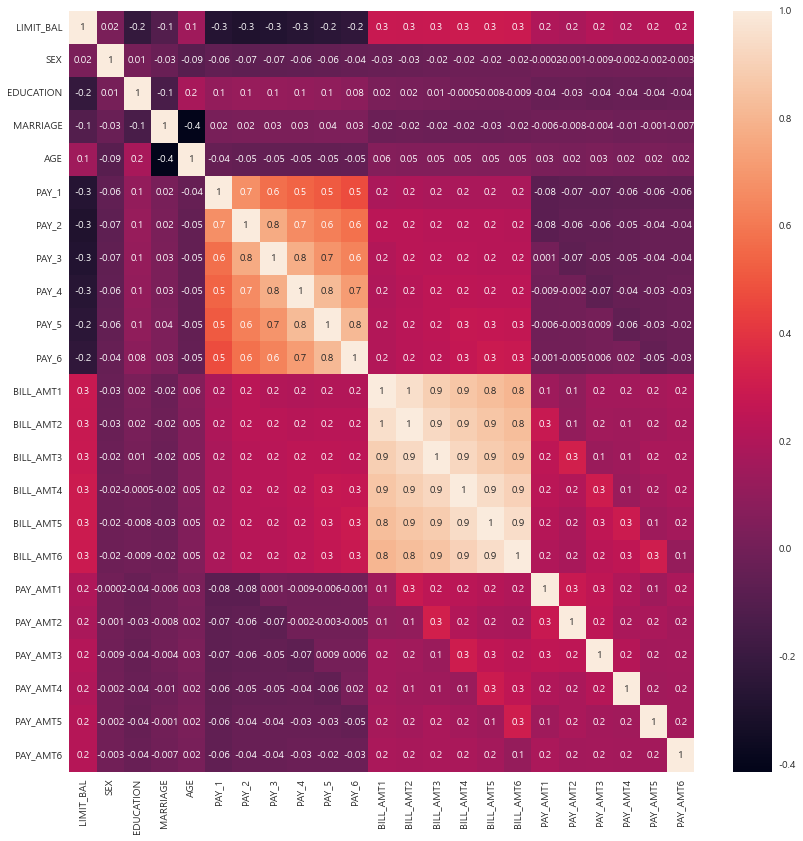

In [25]:
# 각 컬럼별 상관계수를 보고 PCA로 변환하기 위해 seaborn 히트맵을 그림

import seaborn as sns
import matplotlib.pyplot as plt

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True, fmt='.1g')
plt.show()

In [29]:
# BILL_AMT1 ~ BILL_AMT6, PAY_1 ~ PAY 6 속성끼리는 상관도가 매우 높음

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

bill = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

scaler = StandardScaler()
creditcard_bill = scaler.fit_transform(X_features[bill])
creditcard_pay = scaler.fit_transform(X_features[pay])

pca = PCA(n_components = 2)
pca.fit(creditcard_bill)
print(f'BILL 카테고리의 PCA Component별 변동성: {pca.explained_variance_ratio_}')

pca = PCA(n_components = 2)
pca.fit(creditcard_pay)
print(f'PAY 카테고리의 PCA Component별 변동성: {pca.explained_variance_ratio_}')

BILL 카테고리의 PCA Component별 변동성: [0.90962041 0.0452487 ]
PAY 카테고리의 PCA Component별 변동성: [0.71645838 0.11674569]


In [39]:
# 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 평가 결과

scaler = StandardScaler()
creditcard_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 6)
X_pca = pca.fit_transform(creditcard_scaled)

rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 7, min_samples_split = 4, random_state = 0, n_jobs = -1)
score = cross_validate(rf_clf, X_pca, y, scoring = ['accuracy', 'neg_mean_squared_error'], cv = 5)

accuracy = score['test_accuracy']
mse = -1 * score['test_neg_mean_squared_error']
rmse = np.sqrt(mse)

print('정확도 :', round(np.mean(accuracy), 3))
print('mse :', round(np.mean(mse), 3))
print('rmse :', round(np.mean(rmse), 3))

정확도 : 0.804
mse : 0.196
rmse : 0.443
